## Digit recognition

### import the libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(X_train.shape)  # 60000 pictures with 28 x 28 pixels
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
np.min(X_train), np.max(X_train)

(0, 255)

In [8]:
np.isnan(X_train).sum()

0

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


### Visualization

In [10]:
import matplotlib.pyplot as plt

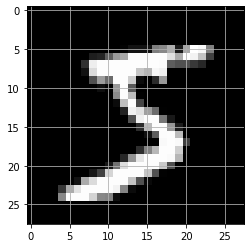

In [11]:
img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray)
# plt.imshow(img, cmap=plt.cm.gray_r)  white background
plt.grid()
plt.show()


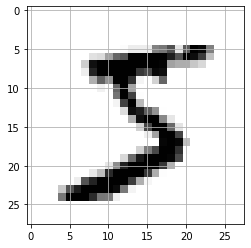

In [12]:
img = X_train[0]
# plt.imshow(img, cmap=plt.cm.gray)
plt.imshow(img, cmap=plt.cm.gray_r) 
plt.grid()
plt.show()

In [13]:
def visual_multi(i):
	nplots = 40  # amount of feature that want to  display
	fig = plt.figure(figsize=(8, 4)) 
	for j in range(nplots):
		plt.subplot(4, 10, j + 1) # 4 Rows x 10 Columns
		plt.imshow(X_train[i+j], cmap=plt.cm.gray)
		plt.title(y_train[i+j],c='w')
		# plt.axis('off')
		plt.xticks([])
		plt.yticks([])
	plt.show()

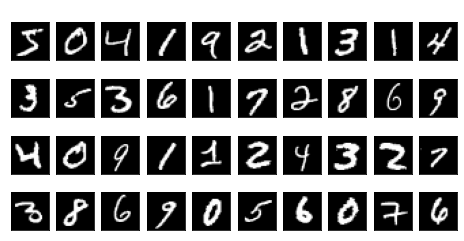

In [14]:
visual_multi(0)

### Prepare for Train & Test

- จัดรูปแบบโครงสร้างจาก 60000 x 28 x 28 ให้เป็น 60000 x 28 x 28 x 1(channel)
- normalize

> convolutional Form => samples x W x W x channel

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# X_train = X_train.reshape((-1, 28, 28, 1))    -1 means remain rows from before
# X_test = X_test.reshape((-1, 28, 28, 1))

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
print(X_train)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

#### Normalization

In [19]:
X_train = X_train.astype('float32') / 255.0   # หาร 255 normalize ให้อยู่ 0 - 1
X_test = X_test.astype('float32') / 255.0     

In [20]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [21]:
X_train[0, 10, 10:15, 0]

array([0.00392157, 0.6039216 , 0.99215686, 0.3529412 , 0.        ],
      dtype=float32)

#### Pick 10000 data to train

In [22]:
num_samples = 10000
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

In [23]:
import warnings

In [24]:
warnings.filterwarnings('ignore')

In [31]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

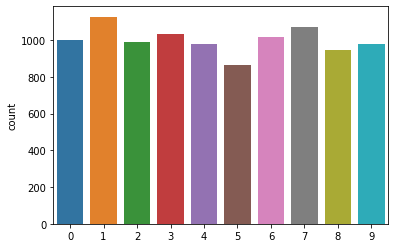

In [26]:
sns.countplot(y_train)

In [29]:
# del sns

<AxesSubplot:ylabel='count'>

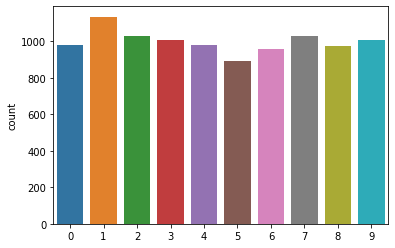

In [32]:
sns.countplot(y_test)

### Create a model

In [33]:
num_classes = len(np.unique(y_train))

In [34]:
num_classes

10

In [35]:
X_train.shape[0:]

(10000, 28, 28, 1)

In [36]:
X_train.shape[1:]

(28, 28, 1)

In [37]:
in_shape = X_train.shape[1:]

In [38]:
in_shape

(28, 28, 1)

#### import the libraries

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

In [42]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [43]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [45]:
from tensorflow.keras.utils import plot_model

In [46]:
plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
import time
start = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1)
end = time.time()
print("Time taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/15
71/71 [==============================] - 4s 47ms/step - loss: 1.0620 - accuracy: 0.6480 - val_loss: 0.2615 - val_accuracy: 0.9210
Epoch 2/15
71/71 [==============================] - 3s 42ms/step - loss: 0.3603 - accuracy: 0.8931 - val_loss: 0.1743 - val_accuracy: 0.9500
Epoch 3/15
71/71 [==============================] - 3s 37ms/step - loss: 0.2583 - accuracy: 0.9226 - val_loss: 0.1395 - val_accuracy: 0.9600
Epoch 4/15
71/71 [==============================] - 3s 38ms/step - loss: 0.2109 - accuracy: 0.9384 - val_loss: 0.1121 - val_accuracy: 0.9710
Epoch 5/15
71/71 [==============================] - 3s 42ms/step - loss: 0.1762 - accuracy: 0.9448 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 6/15
71/71 [==============================] - 3s 37ms/step - loss: 0.1533 - accuracy: 0.9557 - val_loss: 0.0907 - val_accuracy: 0.9740
Epoch 7/15
71/71 [==============================] - 3s 37ms/step - loss: 0.1317 - accuracy: 0.9587 - val_loss: 0.0835 - val_accuracy: 0.9720
Epoch 8/15
71

In [51]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: {:.3f}".format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9825
Accuracy: 0.983


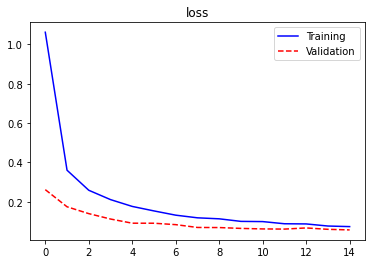

In [56]:
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], 'r--', label='Validation')
plt.title('loss')
plt.legend()
plt.show()